In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import statsmodels.formula.api as smf
#from stargazer.stargazer import Stargazer

In [2]:
epex = pd.read_csv('epex_day_ahead_price.csv')

In [3]:
epex.head()

,timestamp,apx_da_hourly
0,2019-03-31 23:00:00+00:00,26.43
1,2019-03-31 23:30:00+00:00,26.43
2,2019-04-01 00:00:00+00:00,29.24
3,2019-04-01 00:30:00+00:00,29.24
4,2019-04-01 01:00:00+00:00,35.10


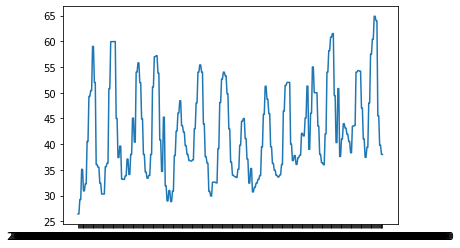

In [4]:
# price over a couple of days in 2019
plt.plot(epex.head(48*7)['timestamp'], epex.head(48*7)['apx_da_hourly'])
plt.show()

In [5]:
# data cleaning - changing timestamp to y, m, d, h, m, s
epex[['date','time']] = epex['timestamp'].str.split(' ', expand=True)
epex[['time','z']] = epex['time'].str.split('+', expand=True)
epex[['h','m', 's']] = epex['time'].str.split(':', expand=True)
epex[['y','mth', 'd']] = epex['date'].str.split('-', expand=True)
epex.drop(['timestamp', 'date', 'time', 'z', 's'], axis=1, inplace=True)
epex

,apx_da_hourly,h,m,y,mth,d
0,26.43,23,00,2019,03,31
1,26.43,23,30,2019,03,31
2,29.24,00,00,2019,04,01
3,29.24,00,30,2019,04,01
4,35.10,01,00,2019,04,01
...,...,...,...,...,...,...
47853,315.00,21,30,2021,12,22
47854,276.85,22,00,2021,12,22
47855,276.85,22,30,2021,12,22
47856,325.40,23,00,2021,12,22


In [6]:
# drop duplicate prices every 30 mins
epex = epex.drop(epex[epex.m == '30'].index)
epex.drop('m', axis=1, inplace=True)
epex

,apx_da_hourly,h,y,mth,d
0,26.43,23,2019,03,31
2,29.24,00,2019,04,01
4,35.10,01,2019,04,01
6,30.91,02,2019,04,01
8,32.26,03,2019,04,01
...,...,...,...,...,...
47848,360.60,19,2021,12,22
47850,318.40,20,2021,12,22
47852,315.00,21,2021,12,22
47854,276.85,22,2021,12,22


In [7]:
#seasonality: we split year in four seasons: 
#spring: MAR-APR-MAI, summer: JUN-JUL-AUG, automn: SEP-OKT-NOV, winter: DEC-JAN-FEB
epex_yr = list()
epex_spr = epex
epex_spr =  epex_spr.drop(epex_spr[epex_spr.mth == '01'].index)
epex_spr =  epex_spr.drop(epex_spr[epex_spr.mth == '02'].index)
epex_spr =  epex_spr.drop(epex_spr[epex_spr.mth == '06'].index)
epex_spr =  epex_spr.drop(epex_spr[epex_spr.mth == '07'].index)
epex_spr =  epex_spr.drop(epex_spr[epex_spr.mth == '08'].index)
epex_spr =  epex_spr.drop(epex_spr[epex_spr.mth == '09'].index)
epex_spr =  epex_spr.drop(epex_spr[epex_spr.mth == '10'].index)
epex_spr =  epex_spr.drop(epex_spr[epex_spr.mth == '11'].index)
epex_spr =  epex_spr.drop(epex_spr[epex_spr.mth == '12'].index)

# calculates spring average price
expec_yr.append(epex_spr['apx_da_hourly'].mean())

44.81351300799187

In [8]:
#summer
epex_sum = epex

epex_sum =  epex_sum.drop(epex_sum[epex_sum.mth == '01'].index)
epex_sum =  epex_sum.drop(epex_sum[epex_sum.mth == '02'].index)
epex_sum =  epex_sum.drop(epex_sum[epex_sum.mth == '03'].index)
epex_sum =  epex_sum.drop(epex_sum[epex_sum.mth == '04'].index)
epex_sum =  epex_sum.drop(epex_sum[epex_sum.mth == '05'].index)
epex_sum =  epex_sum.drop(epex_sum[epex_sum.mth == '09'].index)
epex_sum =  epex_sum.drop(epex_sum[epex_sum.mth == '10'].index)
epex_sum =  epex_sum.drop(epex_sum[epex_sum.mth == '11'].index)
epex_sum =  epex_sum.drop(epex_sum[epex_sum.mth == '12'].index)

# calculates summer average price
expec_yr.append(epex_sum['apx_da_hourly'].mean())

54.26209692028977

In [9]:
#automn
epex_aut = epex

epex_aut =  epex_aut.drop(epex_aut[epex_aut.mth == '01'].index)
epex_aut =  epex_aut.drop(epex_aut[epex_aut.mth == '02'].index)
epex_aut =  epex_aut.drop(epex_aut[epex_aut.mth == '03'].index)
epex_aut =  epex_aut.drop(epex_aut[epex_aut.mth == '04'].index)
epex_aut =  epex_aut.drop(epex_aut[epex_aut.mth == '05'].index)
epex_aut =  epex_aut.drop(epex_aut[epex_aut.mth == '06'].index)
epex_aut =  epex_aut.drop(epex_aut[epex_aut.mth == '07'].index)
epex_aut =  epex_aut.drop(epex_aut[epex_aut.mth == '08'].index)
epex_aut =  epex_aut.drop(epex_aut[epex_aut.mth == '12'].index)

# calculates autumn average price
expec_yr.append(epex_aut['apx_da_hourly'].mean())

89.5184065934067

In [34]:
#winter
epex_win = epex

epex_win =  epex_win.drop(epex_win[epex_win.mth == '03'].index)
epex_win =  epex_win.drop(epex_win[epex_win.mth == '04'].index)
epex_win =  epex_win.drop(epex_win[epex_win.mth == '05'].index)
epex_win =  epex_win.drop(epex_win[epex_win.mth == '06'].index)
epex_win =  epex_win.drop(epex_win[epex_win.mth == '07'].index)
epex_win =  epex_win.drop(epex_win[epex_win.mth == '08'].index)
epex_win =  epex_win.drop(epex_win[epex_win.mth == '09'].index)
epex_win =  epex_win.drop(epex_win[epex_win.mth == '10'].index)
epex_win =  epex_win.drop(epex_win[epex_win.mth == '11'].index)

# calculates winter average price
expec_yr.append(epex_win['apx_da_hourly'].mean())
plt.plot(['spring','summer','automn','winter'], epex_month_mean)

NameError: name 'expec_yr' is not defined

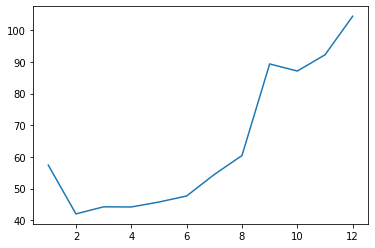

In [11]:
#mean price per month
epex_month_mean = list()
month = [1,2,3,4,5,6,7,8,9,10,11,12]
epex_month_mean.append(epex[epex.mth=='01']['apx_da_hourly'].mean()) #jan
epex_month_mean.append(epex[epex.mth=='02']['apx_da_hourly'].mean()) #feb
epex_month_mean.append(epex[epex.mth=='03']['apx_da_hourly'].mean()) #mar
epex_month_mean.append(epex[epex.mth=='04']['apx_da_hourly'].mean()) #apr
epex_month_mean.append(epex[epex.mth=='05']['apx_da_hourly'].mean()) #mai
epex_month_mean.append(epex[epex.mth=='06']['apx_da_hourly'].mean()) #jun
epex_month_mean.append(epex[epex.mth=='07']['apx_da_hourly'].mean()) #jul
epex_month_mean.append(epex[epex.mth=='08']['apx_da_hourly'].mean()) #aug
epex_month_mean.append(epex[epex.mth=='09']['apx_da_hourly'].mean()) #sep
epex_month_mean.append(epex[epex.mth=='10']['apx_da_hourly'].mean()) #oct
epex_month_mean.append(epex[epex.mth=='11']['apx_da_hourly'].mean()) #nov
epex_month_mean.append(epex[epex.mth=='12']['apx_da_hourly'].mean()) #dec
                       
epex_month_mean

plt.plot(month, epex_month_mean)

Here we clearly see that the average prices is much higher in the winter months than the other months. The low is in spring.

In [12]:
# changing data types to feed into model
epex['y'] = epex['y'].astype(int)
epex['mth'] = epex['mth'].astype(int)
epex['d'] = epex['d'].astype(int)
epex['h'] = epex['h'].astype(int)
epex.dtypes

apx_da_hourly    float64
h                  int64
y                  int64
mth                int64
d                  int64
dtype: object

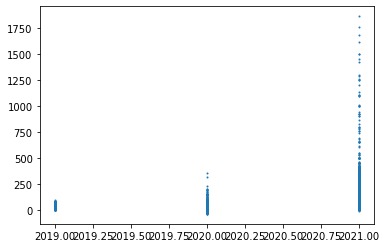

In [13]:
# prices per year
plt.scatter(epex['y'], epex['apx_da_hourly'], s=1)
#plt.figure(figsize=(100,100))
plt.show()

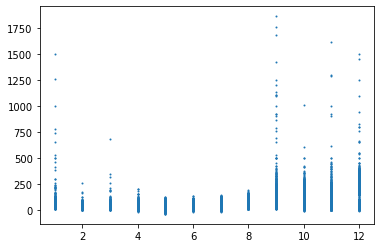

In [14]:
# prices per month
plt.scatter(epex['mth'], epex['apx_da_hourly'], s=1)
#plt.figure(figsize=(100,100))
plt.show()

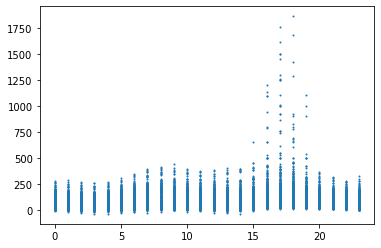

In [15]:
# prices per hour
plt.scatter(epex['h'], epex['apx_da_hourly'], s=1)
#plt.figure(figsize=(100,100))
plt.show()

We see that a lot of the extreme price jumps occur in the evening hours between 4pm and 8pm.

(array([ 27.,   7.,   2.,   0.,   0.,   0.,   1., 181., 274., 705.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

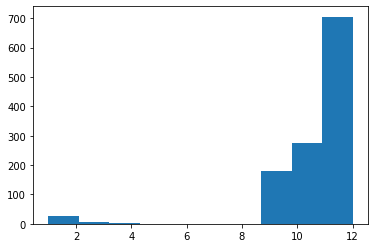

In [33]:
#extreme values - we look at 95% quartile
extr = []
epex.quantile([0.95]) #5% of values ar elarger than 187.4, these are considered as extreme value

for i in range(0,47856,2):
    if epex['apx_da_hourly'][i] >= 187.4:
        extr.append(epex['mth'][i])
#print(extr)
plt.hist(extr)

We investigated when the big price jumps occured. We notice that the big price jumps usually occur in the winter.

In [16]:
# initial regression model with all combinations of variables
epexm1 = smf.ols(formula = 'apx_da_hourly ~ y*mth^2 + y*mth + mth*d^2 + mth*d + d*h^2 + d*h', data=epex).fit()
print(epexm1.summary())

                            OLS Regression Results                            
Dep. Variable:          apx_da_hourly   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     1224.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:05:18   Log-Likelihood:            -1.3006e+05
No. Observations:               23929   AIC:                         2.601e+05
Df Residuals:                   23915   BIC:                         2.603e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.009e+04   2441.669      8.226      0.0

In [17]:
# forward stepwise regression to drop variables
epexm1 = smf.ols(formula = 'apx_da_hourly ~ y*mth^2 + y*mth + mth*d^2 + mth*d + h^2', data=epex).fit()
print(epexm1.summary())

                            OLS Regression Results                            
Dep. Variable:          apx_da_hourly   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     1591.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:05:18   Log-Likelihood:            -1.3006e+05
No. Observations:               23929   AIC:                         2.601e+05
Df Residuals:                   23918   BIC:                         2.602e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.009e+04   2441.662      8.226      0.0

In [18]:
# adding interaction terms and square terms as columns to epex
epex['y^2'] = epex['y'] ** 2
epex['mth^2'] = epex['mth'] ** 2
epex['d^2'] = epex['d'] ** 2
epex['h^2'] = epex['h'] ** 2
epex['y:mth'] = epex['y'] * epex['mth']
epex['mth:d'] = epex['y'] * epex['mth']
epex['y:mth^2'] = (epex['y'] * epex['mth']) ** 2
epex['mth:d^2'] = (epex['mth'] * epex['d']) ** 2
epex['d:h^2'] = (epex['d'] * epex['h']) ** 2
epex

,apx_da_hourly,h,y,mth,d,y^2,mth^2,d^2,h^2,y:mth,mth:d,y:mth^2,mth:d^2,d:h^2
0,26.43,23,2019,3,31,4076361,9,961,529,6057,6057,36687249,8649,508369
2,29.24,0,2019,4,1,4076361,16,1,0,8076,8076,65221776,16,0
4,35.10,1,2019,4,1,4076361,16,1,1,8076,8076,65221776,16,1
6,30.91,2,2019,4,1,4076361,16,1,4,8076,8076,65221776,16,4
8,32.26,3,2019,4,1,4076361,16,1,9,8076,8076,65221776,16,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47848,360.60,19,2021,12,22,4084441,144,484,361,24252,24252,588159504,69696,174724
47850,318.40,20,2021,12,22,4084441,144,484,400,24252,24252,588159504,69696,193600
47852,315.00,21,2021,12,22,4084441,144,484,441,24252,24252,588159504,69696,213444
47854,276.85,22,2021,12,22,4084441,144,484,484,24252,24252,588159504,69696,234256


In [19]:
#80-20 splits of data training and test dataset
from sklearn.model_selection import train_test_split
X_columns = ['y', 'y:mth^2', 'y:mth', 'd^2', 'mth:d^2', 'd', 'mth:d', 'h^2']
X_train, X_test, y_train, y_test = train_test_split(epex[X_columns], epex['apx_da_hourly'], test_size=0.2, random_state=0)

In [20]:
#trains model
from sklearn.linear_model import LinearRegression
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# retrieves coefficient and intercept values for each regressor variable
Coeff = pd.DataFrame({
    'variable': X_train.columns, 
    'coefficient': model.coef_,
    'intercept': model.intercept_
})
Coeff

,variable,coefficient,intercept
0,y,4.534060e+01,-91580.338661
1,y:mth^2,1.136437e-07,-91580.338661
2,y:mth,4.715160e-04,-91580.338661
3,d^2,-4.596944e-02,-91580.338661
4,mth:d^2,-4.635079e-05,-91580.338661
5,d,1.509731e+00,-91580.338661
6,mth:d,4.715159e-04,-91580.338661
7,h^2,3.268667e-02,-91580.338661


In [22]:
#prints preview of price predictions made by linear regression model
y_pred = model.predict(X_test)
print(y_pred)

[ -5.45589106  66.21063328   7.38184886 ...  78.89490877  95.27157541
 167.67577233]


In [23]:
#calculates R value
model.score(X_test, y_test)

0.31027258408485536

In [24]:
#calculates intercept of line of best fit
model.intercept_

-91580.33866117799

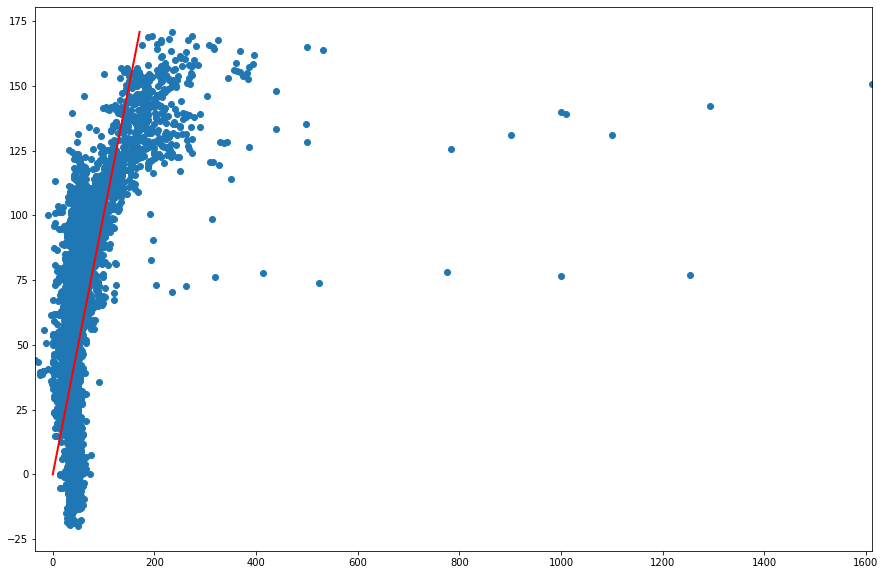

In [25]:
#sets up plot
plt.figure(figsize=(15,10))
x = np.linspace(0, y_pred.max())
plt.margins(x=0)

#graphs the actual vs prediction 
plt.scatter(y_test, y_pred)

#displays line of best fit using model.score and model.intercept
plt.plot(
    x + model.score(X_test, y_test),
    x, 
    linewidth=2, 
    markersize=12, 
    color='r'
)

In [26]:
model.coef_

array([ 4.53406000e+01,  1.13643701e-07,  4.71516034e-04, -4.59694377e-02,
       -4.63507912e-05,  1.50973063e+00,  4.71515917e-04,  3.26866734e-02])

In [27]:
# Price prediction for 2022-03-13
date_y = 2022
date_m = 3
date_d = 13
beta_0 = model.coef_[0]*date_y + model.coef_[1]*((date_y*date_m)**2) + model.coef_[2]*(date_y*date_m) + model.coef_[3]*(date_d^2) + model.coef_[6]*((date_m*date_d)**2) + model.coef_[5]*date_d + model.coef_[6]*(date_m*date_d) + model.intercept_

In [28]:
# price prediction for each hour of the day using regression model apx_da_hourly = 120.887 + 0.0326h^2
for i in range(0, 24):
    print(i, round(beta_0 + (model.coef_[-1] * i**2), 3))

0 125.069
1 125.102
2 125.2
3 125.363
4 125.592
5 125.886
6 126.246
7 126.671
8 127.161
9 127.717
10 128.338
11 129.024
12 129.776
13 130.593
14 131.475
15 132.423
16 133.437
17 134.515
18 135.659
19 136.869
20 138.144
21 139.484
22 140.889
23 142.36


<function matplotlib.pyplot.show(close=None, block=None)>

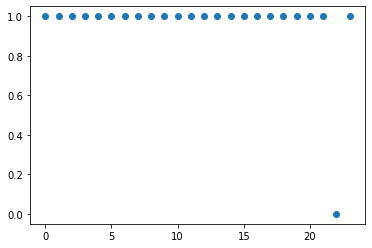

In [29]:
# (using AMPL for optimisation code) these are the buy/sell decisions at each hour. 
# Using our model we buy at 11pm and sell the next day at 10pm.
hour = [23,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
battery = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0]
plt.scatter(hour, battery)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

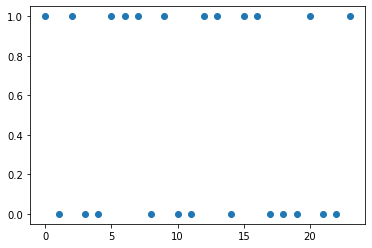

In [30]:
# Using the real prices on 13/03/2022 the model suggests to buy and sell at these times:
hour = [23,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
battery = [1,1,0,1,0,0,1,1,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0]
plt.scatter(hour, battery)
plt.show

Thank you for reading.